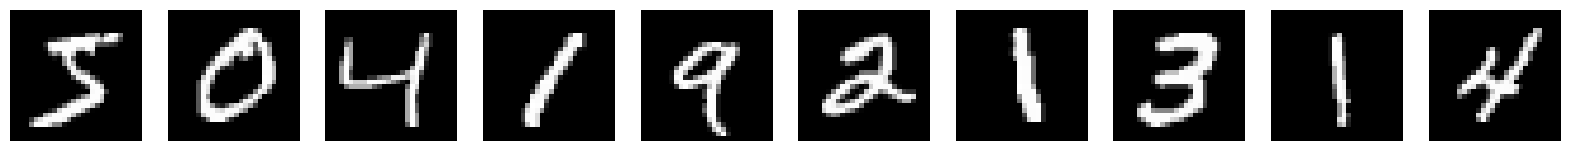

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow
import keras
import xgboost
import lightgbm
import seaborn as sns
import cv2
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan beberapa gambar
fig, axes = plt.subplots(1, 10, figsize=(20, 3))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
plt.show()

In [121]:
x_train= x_train/255.0
x_test= x_test/255.0

In [122]:
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [123]:
model = Sequential(
    [
        Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
        MaxPooling2D(2,2),
        Conv2D(64, (3,3),activation='relu'),
        MaxPooling2D(2,2),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax'),
    ]
)

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc']
              )

model.summary()

Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_62 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_62 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_63 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_63 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_31 (Flatten)            │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [124]:
history = model.fit(x_train, y_train, epochs=1, validation_data=(x_test, y_test))

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - acc: 0.9109 - loss: 0.2938 - val_acc: 0.9855 - val_loss: 0.0445


In [125]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Akurasi Model: {test_acc * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9829 - loss: 0.0524
Akurasi Model: 98.55%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


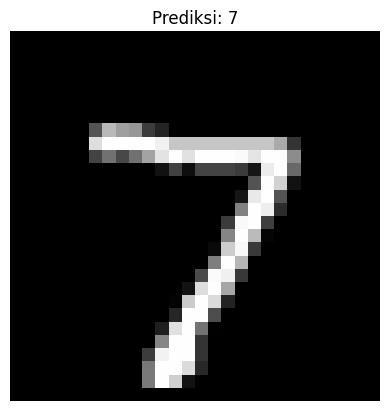

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


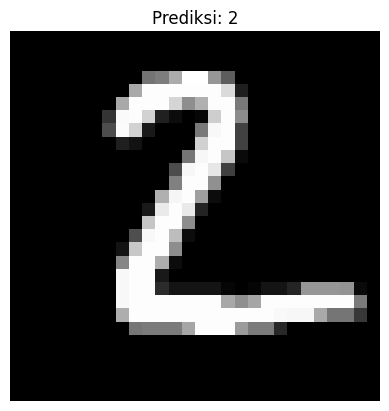

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


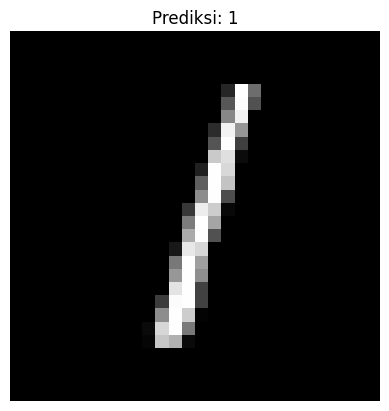

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


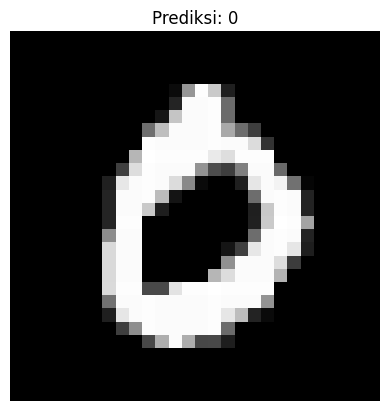

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


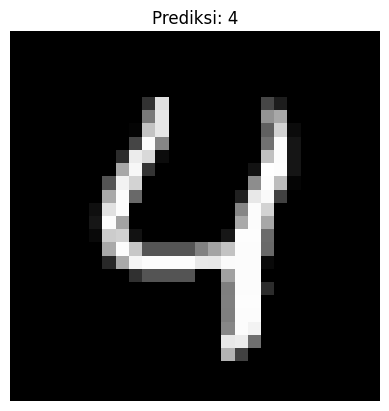

5


In [126]:
number = []

i = 0

while i < 5:
    number.append(i)
    i += 1
    
for i in number :
    sample_image = x_test[i].reshape(1, 28, 28, 1)

    prediction = model.predict(sample_image)
    predicted_label = np.argmax(prediction)

    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Prediksi: {predicted_label}")
    plt.axis('off')
    plt.show()
    
print(len(number))


In [127]:
model.save("digit_recognizer.h5")